In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../s0e_prepData_LnAn/db_LnAn_full.xlsx"
df = pd.read_excel(file_path, header=1)

In [3]:
print("Data point count: ", df.shape[0])
print("Extractant count: ", len(set(df['SMILES'])))

Data point count:  8075
Extractant count:  295


## Analyze the metal

In [4]:
print("Metal count: ", len(set(df['Metal'])))

Metal count:  28


In [5]:
df['Metal_noOx'] = df['Metal'].str.replace(r'\(.*\)', '', regex=True)
metal_counts_sort_series = df['Metal_noOx'].value_counts()
metal_counts_sort_series

Metal_noOx
Am    1406
Eu    1164
U      547
Th     453
Ce     390
Dy     376
Nd     356
La     342
Pr     333
Sm     327
Gd     324
Er     299
Np     287
Ho     254
Tb     244
Lu     241
Yb     235
Pu     220
Tm     200
Cm      49
Pa      23
Cf       4
Pm       1
Name: count, dtype: int64

In [6]:
Ln_list = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
An_list = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
LnAn_list = Ln_list + An_list
metal_counts_pTableOrder = pd.Series(data=metal_counts_sort_series, index=LnAn_list).dropna()
metal_counts_pTableOrder

La     342.0
Ce     390.0
Pr     333.0
Nd     356.0
Pm       1.0
Sm     327.0
Eu    1164.0
Gd     324.0
Tb     244.0
Dy     376.0
Ho     254.0
Er     299.0
Tm     200.0
Yb     235.0
Lu     241.0
Th     453.0
Pa      23.0
U      547.0
Np     287.0
Pu     220.0
Am    1406.0
Cm      49.0
Cf       4.0
Name: count, dtype: float64

In [7]:
df_metal_counts_pTableOrder = metal_counts_pTableOrder.reset_index()
df_metal_counts_pTableOrder.columns = ['Metal', 'Count']

highlight_metals = ['Eu', 'Am']
default_color = sns.color_palette("deep")[3]
palette_dict = {
    metal: default_color if metal in highlight_metals else 'gray' for metal in df_metal_counts_pTableOrder['Metal']
}

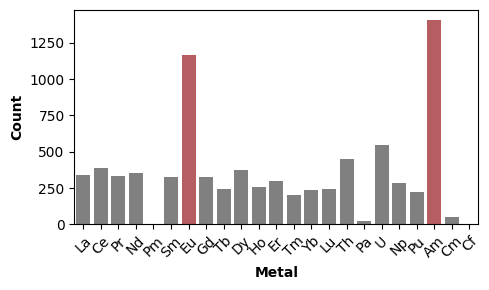

In [8]:
plt.figure(figsize=(5, 3))
sns.barplot(data=df_metal_counts_pTableOrder, x='Metal', y='Count', hue='Metal', palette=palette_dict, legend=False)

plt.xlabel('Metal', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## Analyze the log D

In [9]:
print("median log D: ", df['Log_D'].median())
print("mean log D: ", df['Log_D'].mean())

median log D:  0.1391304347826051
mean log D:  0.03875060991723677


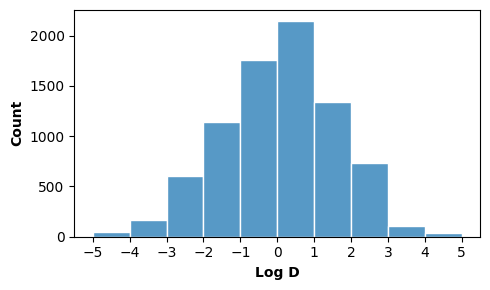

In [10]:
bins = np.arange(-5, 6, 1)

plt.figure(figsize=(5, 3))
sns.histplot(df['Log_D'], bins=bins, edgecolor='white')

plt.xlabel('Log D', fontsize=10, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xticks(bins, fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

## Analyze the solvents

In [11]:
print("Unique solvent A count: ", len(set(df['Solvent_A'])))
print("Unique solvent B count: ", len(set(df['Solvent_B'].dropna())))
print("Unique solvent A+B count: ", len(set(pd.concat([df['Solvent_A'],df['Solvent_B']]).dropna())))

Unique solvent A count:  42
Unique solvent B count:  6
Unique solvent A+B count:  45


In [12]:
solvent_series = pd.concat([df['Solvent_A'], df['Solvent_B']]).dropna()

solvent_counts_sort_series = solvent_series.value_counts()
solvent_counts_sort_series

n-dodecane                        2376
1-octanol                         1638
kerosene                           839
toluene                            569
Isopar L                           481
Exxal 13                           481
hydrogenated tetrapropylene        472
chloroform                         356
Tetrachloroethylene                236
nitrobenzene                       229
1,2-dichloroethane                 186
tetrachloroethane                  160
1,4-diisopropylbenzene             156
phenyl trifluoromethyl sulfone     149
tert-butylbenzene                  146
CH3Cl                              140
1-dodecanol                        137
[C4mim][Tf2N]                      130
meta-nitrobenzotrifluoride         110
Dichloromethane                    109
iso-decanol                        109
Decalin                            109
cyclohexanone                       86
n-octane                            75
sulfonated kerosene                 66
SSD70                    

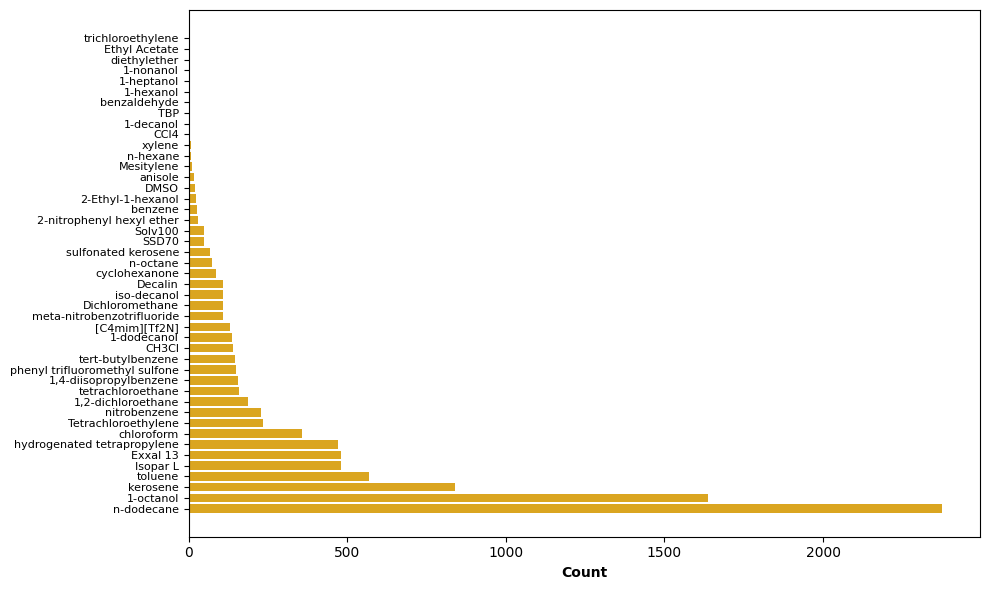

In [14]:
plt.figure(figsize=(10, 6))
plt.barh(solvent_counts_sort_series.index, solvent_counts_sort_series.values, color='goldenrod')
plt.xlabel('Count', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

In [17]:
solvent_counts_sort_series_top10 = solvent_counts_sort_series[0:10]
solvent_counts_sort_series_top10

n-dodecane                     2376
1-octanol                      1638
kerosene                        839
toluene                         569
Isopar L                        481
Exxal 13                        481
hydrogenated tetrapropylene     472
chloroform                      356
Tetrachloroethylene             236
nitrobenzene                    229
Name: count, dtype: int64

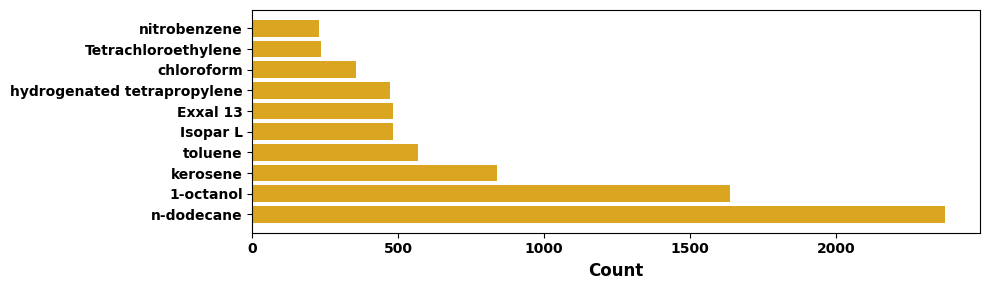

In [18]:
plt.figure(figsize=(10, 3))
plt.barh(solvent_counts_sort_series_top10.index, solvent_counts_sort_series_top10.values, color='goldenrod')

plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

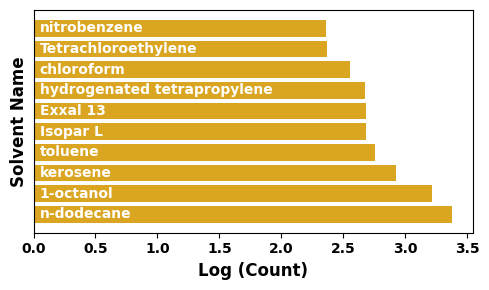

In [19]:
plt.figure(figsize=(5, 3))
bars = plt.barh(
    solvent_counts_sort_series_top10.index,
    np.log10(solvent_counts_sort_series_top10.values),
    color='goldenrod'
)

plt.xlabel('Log (Count)', fontsize=12, fontweight='bold')
plt.ylabel('Solvent Name', fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.yticks([])

for bar, solvent in zip(bars, solvent_counts_sort_series_top10.index):
    width = bar.get_width()
    plt.text(
        0.05,
        bar.get_y() + bar.get_height()/2,
        solvent,
        va='center',
        ha='left',
        fontsize=10,
        fontweight='bold',
        color='white' if width > 0.3 else 'black'
    )

plt.tight_layout()
plt.show()

In [20]:
top10percent = np.sum(solvent_counts_sort_series[0:10].values)/np.sum(solvent_counts_sort_series.values)
top10percent

0.7828081982257571